In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
order_prior = pd.read_csv('./Data/order_products__prior.csv')
order_train = pd.read_csv('./Data/order_products__train.csv')
product = pd.read_csv('./Data/products.csv')
department = pd.read_csv('./Data/departments.csv')
aisle = pd.read_csv('./Data/aisles.csv')

In [7]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
order_train['order_id'].nunique()

131209

## EDA - Orders

Some question I'd like to answer here:

- What is the average amount of orders per customer?
- Is there a difference in orders in days of the week?
- Difference in orders in hours of the day?
- Days since last order distribution?

In [13]:
orders = pd.read_csv('./Data/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [34]:
orders[orders['eval_set']=='prior']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0


In [14]:
# first analyze the orders
# this shows us that there are 206.209 NaN values in the column 'days_since_prior_order'. 
# As we can see there is also a value of 0 in this column. From this we can assume that when day's since prior order is a NaN value, this is a first order
# As these first orders are sometimes the first order of a group of orders of a given customer, I'll leave them as is, but also save them in a new file to do a seperate exploratory analysis

print(orders.isna().sum())
print(orders['days_since_prior_order'].value_counts())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64


In [15]:
first_order = orders[orders['days_since_prior_order'].isna()]
first_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN
...,...,...,...,...,...,...,...
3420930,969311,206205,prior,1,4,12,NaN
3420934,3189322,206206,prior,1,3,18,NaN
3421002,2166133,206207,prior,1,6,19,NaN
3421019,2227043,206208,prior,1,1,15,NaN


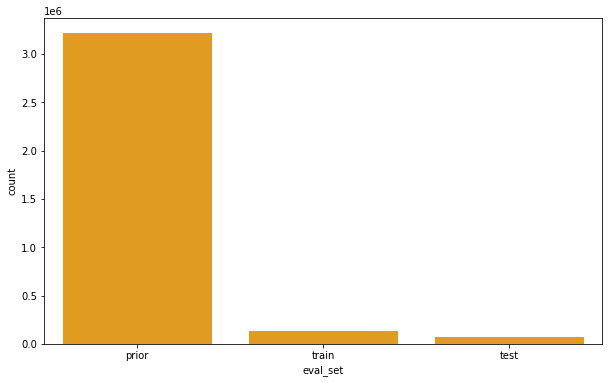

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=orders['eval_set'], data=orders, color = 'orange')
plt.show()

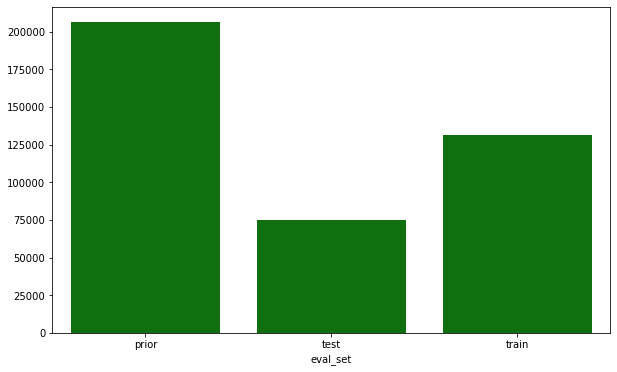

In [17]:
eval_customer = orders.groupby('eval_set')['user_id'].nunique()
eval_customer
plt.figure(figsize=(10,6))
sns.barplot(x=eval_customer.index, y=eval_customer.values, color = 'green')
plt.show()

In [18]:
orders[orders['eval_set'] == 'test'].head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [19]:
order_train[order_train['order_id'] == '350108']

,order_id,product_id,add_to_cart_order,reordered


In [20]:
# above info shows that the current dataset has been divided in three sets. Prior, train & test. 
# the data has been divided this way as this is a dataset for a competition where they want everyone to work on the same train and test dataset. 
# by further researching the dataset I found that the test set only has value in the 'orders' table and thus does not have any information on the products they've ordered or reordered.
# This makes sense, because people who participate in the competition use this set to apply their model to. So InstaCart can check it
# For this reason I am going to drop this information so my computer won't constantly blow up
# For now I'll do the same for the train set, as the dataset that corresponds with that './Data/order_products__train.csv' keeps on blowing up my computer
# If I drop those I still have 3214874 rows left, so still an abundance of data, which I have to sample anyway.


### What is the amount of orders per customer?

In [21]:
# the user_ids currently have duplicates in this dataset as they show all the different orders for a given customer
# Below we can see that we have data of 206209 unique customers in this dataset, together having 3.421.083 orders
print(orders['order_id'].nunique())
print(orders['user_id'].nunique())


3421083
206209


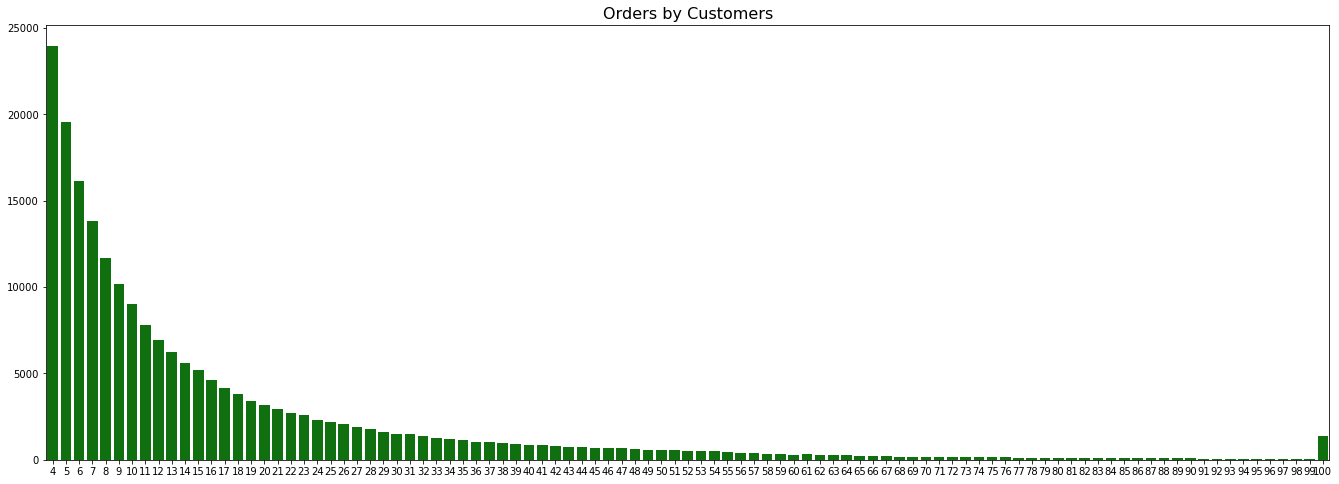

In [22]:
order_customer = orders.groupby('user_id')['order_number'].count().value_counts()

plt.figure(figsize=(23,8))
sns.barplot(x=order_customer.index, y=order_customer.values,color='green')
plt.title('Orders by Customers', fontsize=16)
plt.show()

In [23]:
# the above chart shows us the majority of the customers in this dataset have between 4 and 9 orders.
# there is also a few customers who have 100 orders, this could be explained by the cutoff of 100 orders that has been used for the creation of this dataset


### Day of week - Order distribution

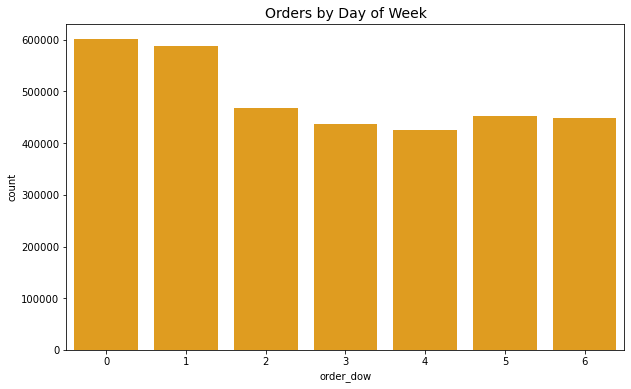

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x=orders['order_dow'], data=orders, color = 'orange')
plt.title('Orders by Day of Week', fontsize=14)
plt.show()

In [25]:
# the documentation of this dataset tells me that 0 = Saturday, 1 = Sunday and so on. 
# We can see in the graph above that the amount of orders is fairly even distributed over the week with a spike on Saturday and Sunday.
# this could be explained by the fact that people are at home to receive their orders and might want to enjoy a lazy day and don't have to go through the trouble of going to the supermarket

### Hour of Day - Order Distribution

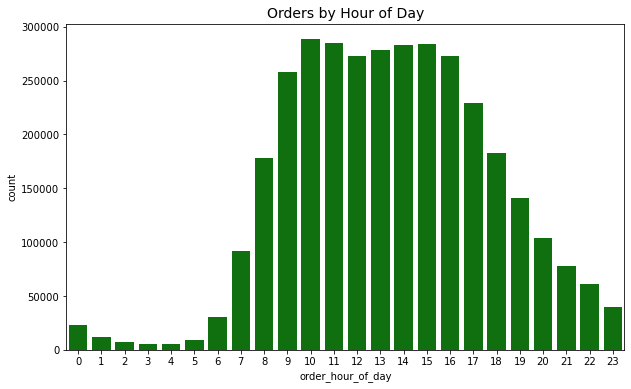

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x=orders['order_hour_of_day'], data=orders, color = 'green')
plt.title('Orders by Hour of Day', fontsize=14)
plt.show()

In [27]:
# the above plot clearly shows that the most orders are placed between 8 and 18. With a peak between 10 and 16. 
# According to Instacarts website they deliver order between 8am and 00.00. This clearly explains the peak between these times.
# Also, since the products Instacart delivers are very basic needs of nature it's less likely someone will order their groceries late at night. 
# the plot also shows that there are soms orders placed outside the delivery hours, this could be explained by the fact an order can be placed at any moment and can then be scheduled between 8am and midnight


### Hours & Day of Week - Combined

In [28]:
hour_day = orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
hour_day_pivot = hour_day.pivot('order_dow', 'order_hour_of_day', 'order_number')
hour_day_pivot

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


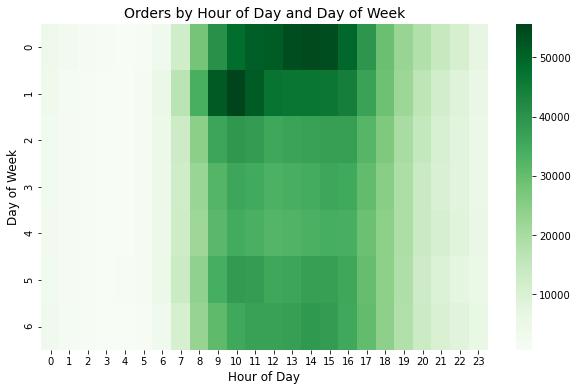

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(hour_day_pivot,cmap="Greens")
plt.title('Orders by Hour of Day and Day of Week', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

In [30]:
# as could be expected we see the highest denisty of hours on Saturday and Sunday. 
# When we look closer, Saturday between 1 and 3 is a very popular time to order. Perhaps people are then thinking about dinner for that night and have an empty fridge from the week before
# Also, Sunday between 9 an 11 in the morning are popular order times. This could be explained by people buying their food in advance for the workweek coming up. 

### Days since prior order

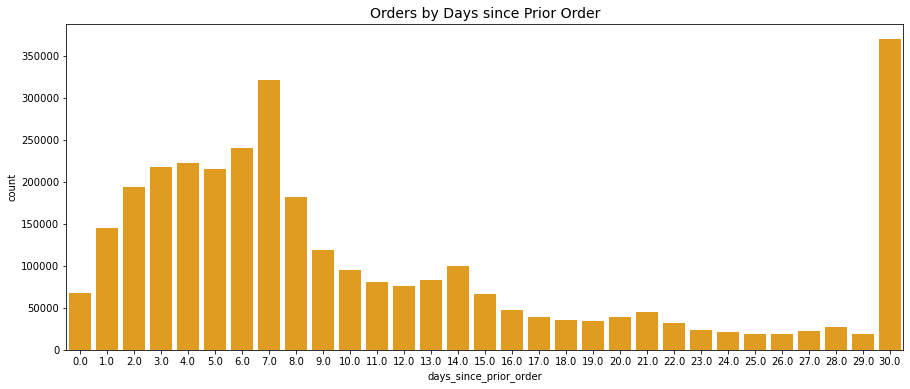

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x=orders['days_since_prior_order'], data=orders, color = 'orange')
plt.title('Orders by Days since Prior Order', fontsize=14)
plt.show()

In [32]:
# Above shows that the  majority of succesive orders are placed between 2 and 8 days. 
# This makes sense as most consumers go to the supermarket between 2 and 4 times a week. 
# The average for US shoppers is 1.6 times a week, explaining the peak around 7 days after the first order
# There is also a big peak around 30 days after the first order, this could be explained by the fact that a lot of consumer are hybrid grocey shoppers
# They might order certain products they are after once a month online, but go to their local supermarket for day-to-day food.


## EDA - What products are in the orders?

In [33]:
# to explore what products are often ordered and what Instacart's assortiment looks like, I need to concat and merge a few datasets


In [39]:
import pymysql
from sqlalchemy import create_engine
import getpass
password = getpass.getpass()

········


In [ ]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/instacart'
engine = create_engine(connection_string)
query = '''SELECT o.user_id, o.order_id, pr.product_id, pr.add_to_cart_order, pr.reordered, p.product_name, a.aisle_id, a.aisle, d.department_id, d.department
FROM instacart.orders o
JOIN instacart.order_products_prior pr USING(order_id)
LEFT JOIN instacart.products p USING(product_id)
LEFT JOIN instacart.departments d USING(department_id)
LEFT JOIN instacart.aisles a USING(aisle_id)'''

all_orders = pd.read_sql_query(query, engine)
all_orders.head()